# 시각화

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'   # Mac 사용자만 해당(레티나 해상도 지원)

## 간단한 matplotlib API

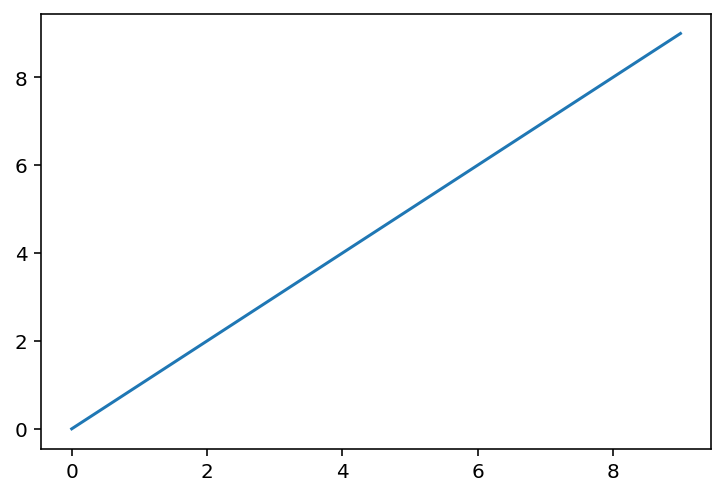

In [3]:
plt.plot(np.arange(10)) 

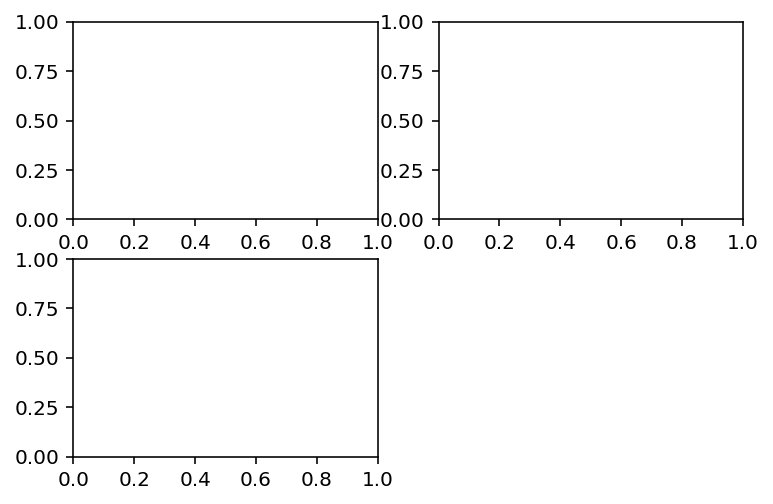

In [4]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)

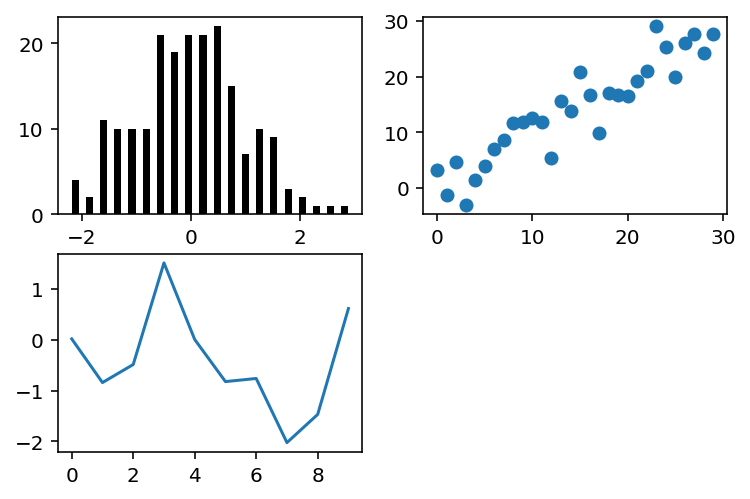

In [5]:
ax1.hist(np.random.randn(200), bins=20, color='k', rwidth=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
ax3.plot(np.arange(10),np.random.randn(10))

fig

- 같은 Code를 두 번 실행하면, 그림이 계속 겹쳐서 그려진다.

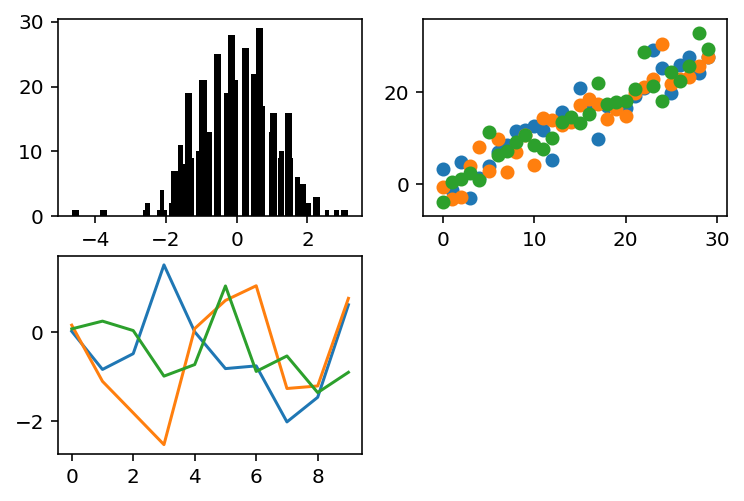

In [7]:
ax1.hist(np.random.randn(200), bins=20, color='k', rwidth=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
ax3.plot(np.arange(10),np.random.randn(10))

fig

(<Figure size 432x288 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021175279808>,
       dtype=object))

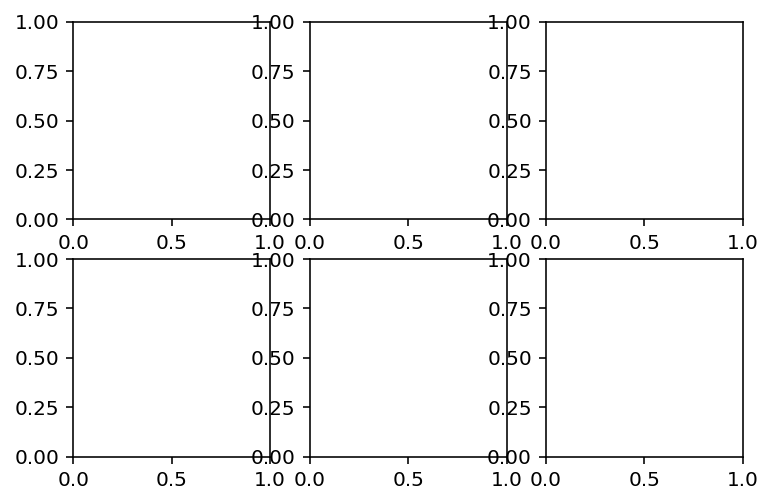

In [8]:
axes = plt.subplots(2, 3) ## 2*3을 설정해주고 아래의 결과를 볼 수 있다.
axes

### Subplot 주변의 공간 조정

In [9]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None) # subplot 간의 간격을 조정하는 함수 _adjust()

<Figure size 432x288 with 0 Axes>

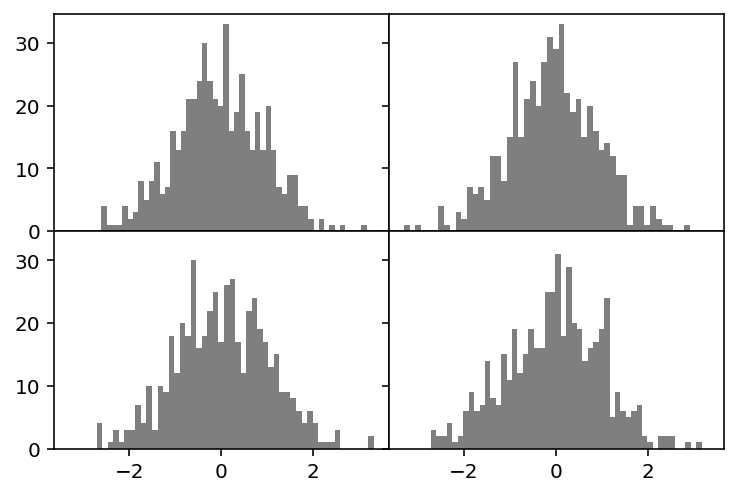

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

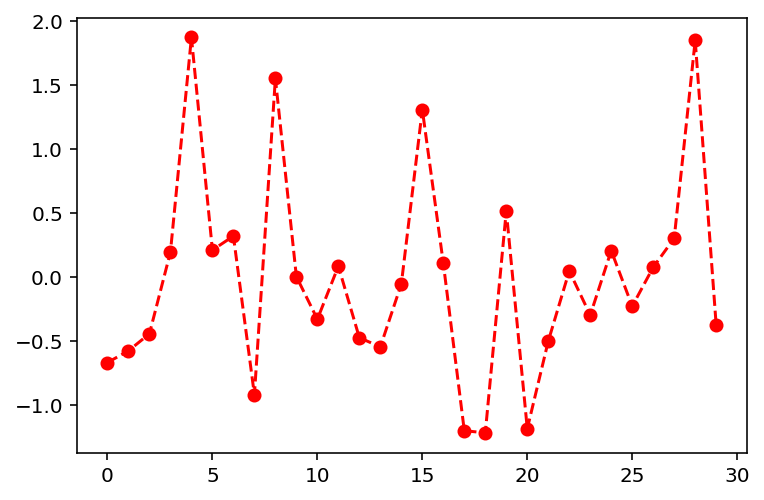

In [12]:
plt.plot(randn(30), 'ro--')

### random number(정규 분포)의 누적값 그래프

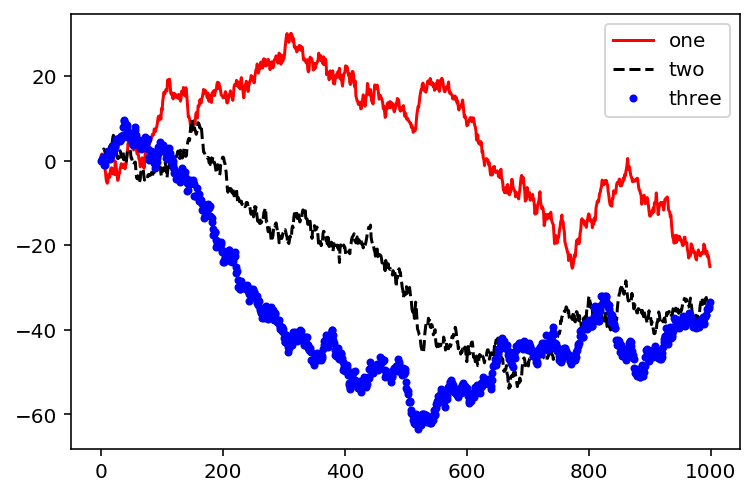

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')

ax.legend(loc='best') 

### 막대 그래프를 subgraph를 이용하여 그리기

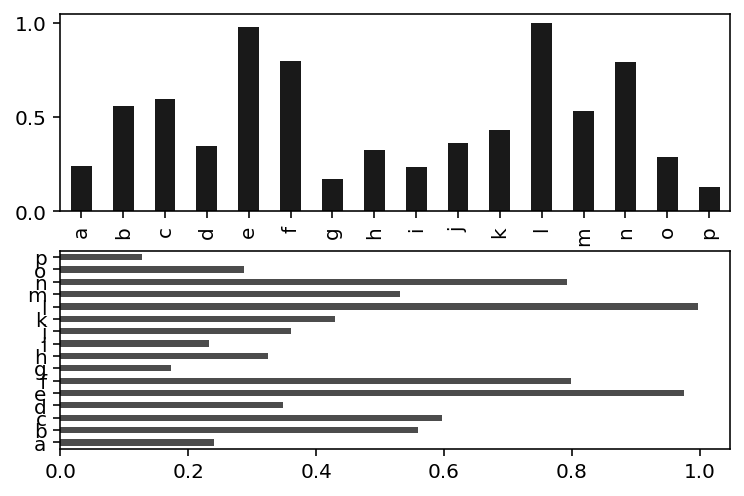

In [15]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.9)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

### subplot 주석달기 및 일반 도형 그리는 방법

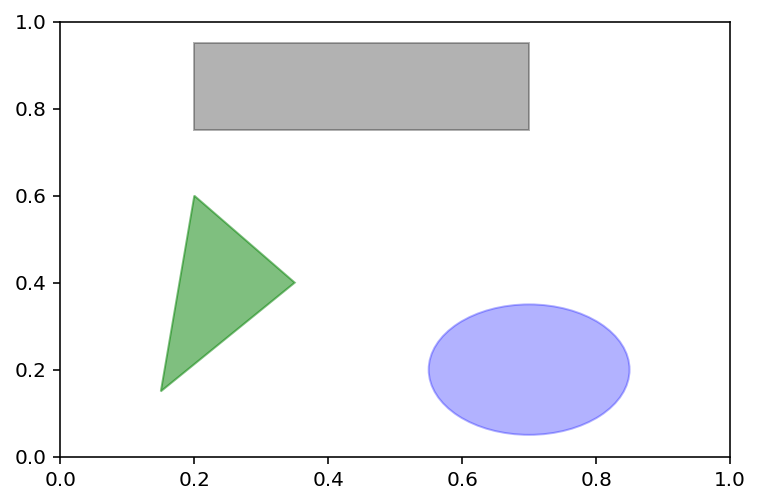

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.5, 0.2, color='k', alpha=0.3) ##(0.2,0.75) 사각형의 시작점 0.5 가로길이 0.2 세로길이를 뜻한다.
                                                            ## alpha 색깔의 명도를 나타내준다 인수를 바꿔서 결과 변화를 확인해보자!
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) ## (0,7,0,2) 원의 중심 을 뜻한다 / 0.15 원의 반지름을 뜻한다.
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], #꼭지점의 좌표
                   color='g', alpha=0.5)

ax.add_patch(rect) ## ax subplot에 도형을 추가한다.
ax.add_patch(circ)
ax.add_patch(pgon)

### DataFrame으로부터 막대 그래프 그리기

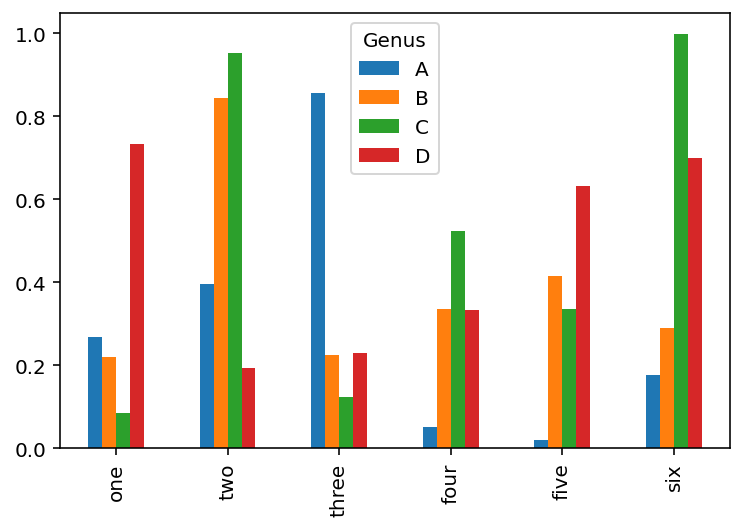

In [14]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='bar')

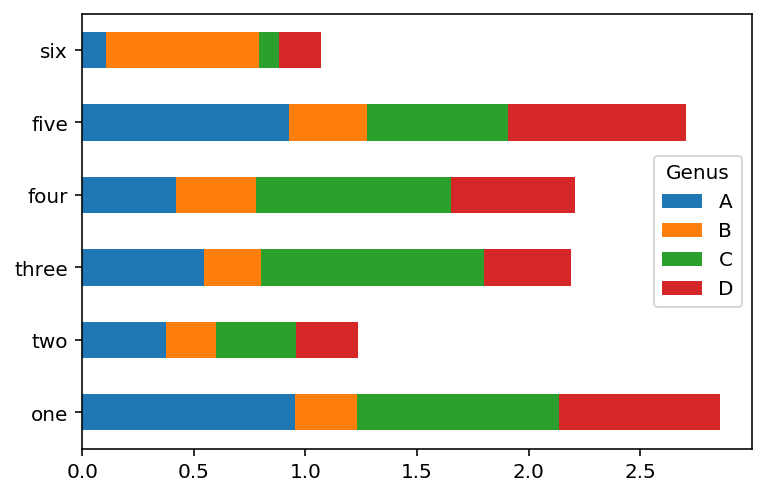

In [18]:
df.plot(kind='barh', stacked=True)

### 히스토그램 및 확률밀도함수 그리기

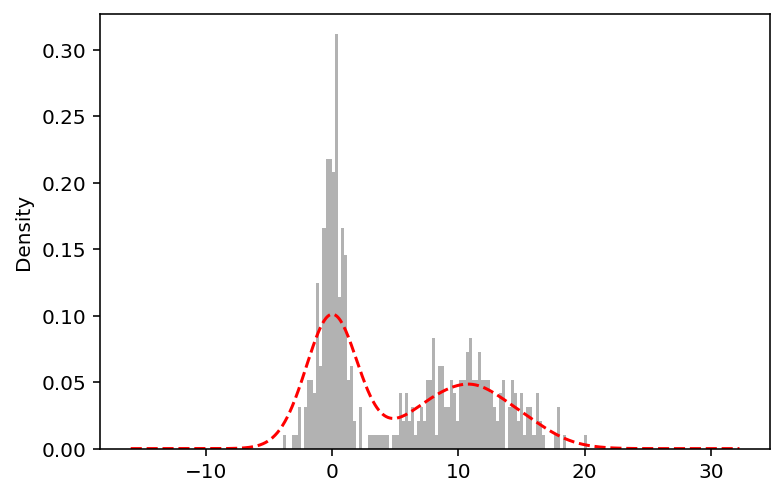

In [19]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 4, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2])) #concat(1,2) -1번째 문자열에 두번째 문자열을 합치는 함수와 동일
values.hist(bins=100, alpha=0.3, color='k', density=True)
values.plot(kind='kde', style='r--')